In [3]:
import pandas as pd
import os

# Assuming raw_data is the folder path containing the CSV file
file_name = "DATA NIR KERING KADAR PROTEIN.csv"  # Replace with the actual file name
file_path = os.path.join("./../raw_data", file_name)

# Read the CSV file from the raw_data folder
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,SAMPEL,PROTEIN,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,MK 1-0,1.12,42.05,42.22,42.35,42.48,42.56,42.69,42.74,42.79,...,25.15,24.97,24.69,24.23,23.73,23.17,22.59,21.81,20.96,20.42
1,MK 1-1,1.12,43.30,43.46,43.58,43.73,43.82,43.98,44.04,44.09,...,25.94,25.73,25.39,24.86,24.26,23.59,22.88,21.94,20.93,20.28
2,MK 1-2,1.12,20.37,20.47,20.48,20.52,20.54,20.61,20.61,20.59,...,11.30,11.24,11.17,10.97,10.77,10.56,10.41,10.22,10.05,9.97
3,MK 1-4,1.12,33.71,33.83,33.82,33.85,33.83,33.90,33.86,33.83,...,18.00,17.85,17.63,17.25,16.83,16.40,16.02,15.50,14.99,14.66
4,MK 1-5,1.12,33.76,33.86,33.86,33.89,33.88,33.94,33.92,33.89,...,18.44,18.29,18.08,17.71,17.32,16.94,16.61,16.15,15.68,15.39


<Figure size 1600x600 with 0 Axes>

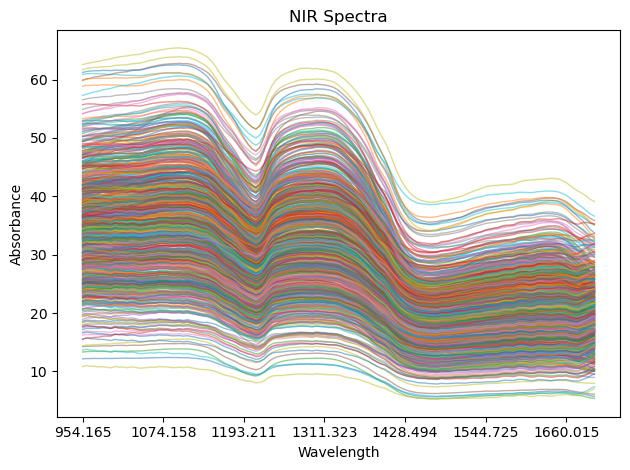

In [4]:
import matplotlib.pyplot as plt

data_plot = data.drop(columns=['SAMPEL', 'PROTEIN'])

plt.figure(figsize=(16, 6))
data_plot.T.plot(legend=False, alpha=0.5, linewidth=1)
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.title('NIR Spectra')
plt.tight_layout()
plt.show()

In [5]:
# Columns to exclude from outlier removal
exclude_cols = ['SAMPEL', 'PROTEIN']

# Select only numeric columns except the excluded ones
numeric_cols = [col for col in data.columns if col not in exclude_cols]

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = data[numeric_cols].quantile(0.35)
Q3 = data[numeric_cols].quantile(0.65)
IQR = Q3 - Q1

# Create a boolean mask for rows without outliers in any numeric column
mask = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the dataframe
data_no_outliers = data[mask].reset_index(drop=True)

<Figure size 1600x600 with 0 Axes>

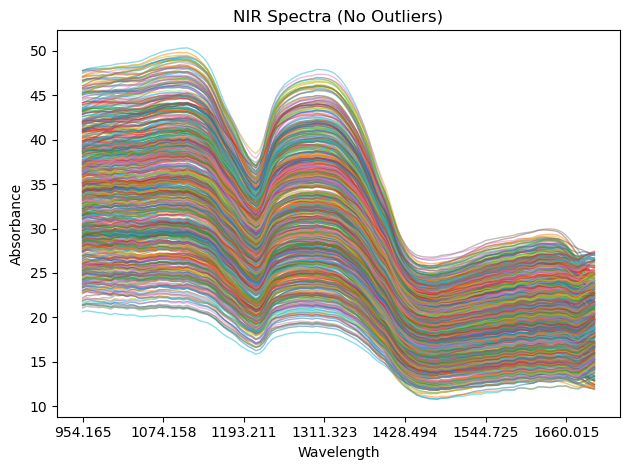

In [6]:
data_no_outliers_plot = data_no_outliers.drop(columns=exclude_cols)

plt.figure(figsize=(16, 6))
data_no_outliers_plot.T.plot(legend=False, alpha=0.5, linewidth=1)
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.title('NIR Spectra (No Outliers)')
plt.tight_layout()
plt.show()

In [7]:
data_no_outliers_plot

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,42.05,42.22,42.35,42.48,42.56,42.69,42.74,42.79,42.91,42.91,...,25.15,24.97,24.69,24.23,23.73,23.17,22.59,21.81,20.96,20.42
1,43.30,43.46,43.58,43.73,43.82,43.98,44.04,44.09,44.20,44.20,...,25.94,25.73,25.39,24.86,24.26,23.59,22.88,21.94,20.93,20.28
2,33.71,33.83,33.82,33.85,33.83,33.90,33.86,33.83,33.88,33.81,...,18.00,17.85,17.63,17.25,16.83,16.40,16.02,15.50,14.99,14.66
3,33.76,33.86,33.86,33.89,33.88,33.94,33.92,33.89,33.96,33.92,...,18.44,18.29,18.08,17.71,17.32,16.94,16.61,16.15,15.68,15.39
4,45.64,45.77,45.80,45.86,45.86,45.95,45.95,45.95,46.06,46.05,...,28.09,27.92,27.64,27.22,26.82,26.45,26.17,25.73,25.26,24.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,36.66,36.88,36.76,36.70,36.55,36.54,36.42,36.25,36.45,36.29,...,24.33,24.26,24.24,23.96,23.79,23.74,23.99,24.15,24.32,24.45
649,27.63,27.85,27.77,27.76,27.68,27.71,27.63,27.50,27.73,27.62,...,18.24,18.18,18.20,17.97,17.85,17.82,18.09,18.30,18.58,18.78
650,28.99,29.24,29.20,29.24,29.18,29.26,29.21,29.12,29.38,29.30,...,18.96,18.90,18.91,18.69,18.59,18.58,18.90,19.17,19.52,19.77
651,27.90,28.12,28.02,28.00,27.90,27.94,27.85,27.71,27.94,27.84,...,18.19,18.18,18.27,18.12,18.08,18.11,18.46,18.77,19.22,19.54


In [8]:
data_no_outliers.to_csv("653_RAW_NIR_KERING_PROTEIN.csv", index=False)